In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_ts_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/maps/tstream_2.h5','r')
file_ag_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/amp_pt001_phase_pt001/app_gain_2.h5','r')
file_rg_2=h5py.File('/home/zahra/PIPELINE/example_2by3_array/draco_synthesis/rand_gains/sig_pt0010.h5')

In [3]:
measured_vis=np.array([file_ag_2['vis'][0,2,:],file_ag_2['vis'][0,25,:],file_ag_2['vis'][0,59,:],file_ag_2['vis'][0,70,:],file_ag_2['vis'][0,6,:],file_ag_2['vis'][0,29,:],file_ag_2['vis'][0,48,:],file_ag_2['vis'][0,9,:],file_ag_2['vis'][0,27,:],file_ag_2['vis'][0,31,:],file_ag_2['vis'][0,46,:],file_ag_2['vis'][0,4,:],file_ag_2['vis'][0,61,:],file_ag_2['vis'][0,10,:],file_ag_2['vis'][0,44,:]])

In [4]:
mv = measured_vis.real
mv=mv+np.abs(mv.min())
zer = mv==0
mv[zer]=1.e-10
d=np.log(mv)

In [5]:
A=np.array([1,1,0,0,0,0,1,0,0,0,0,
            0,1,1,0,0,0,1,0,0,0,0,
            0,0,0,1,1,0,1,0,0,0,0,
            0,0,0,0,1,1,1,0,0,0,0,
            1,0,0,1,0,0,0,1,0,0,0,
            0,1,0,0,1,0,0,1,0,0,0,
            0,0,1,0,0,1,0,1,0,0,0,
            1,0,0,0,1,0,0,0,1,0,0,
            0,1,0,1,0,0,0,0,1,0,0,
            0,1,0,0,0,1,0,0,1,0,0,
            0,0,1,0,1,0,0,0,1,0,0,
            1,0,0,0,0,0,0,0,0,1,0,
            0,0,0,1,0,1,0,0,0,1,0,
            1,0,0,0,0,1,0,0,0,0,1,
            0,0,1,1,0,0,0,0,0,0,1,
            ])
A=np.reshape(A,(15,11))

In [6]:
A_t=np.transpose(A)
a=np.linalg.inv((np.matmul(A_t,A)))
b=np.matmul(A_t,d)
x=np.matmul(a,b)
print (x.shape)
#print (np.argwhere(np.isnan(A_t)))

(11, 1024)


In [7]:
a_shape_before = A_t.shape
print (a_shape_before)
a_shape_after = A_t[np.logical_not(np.isnan(A_t))].shape
print (a_shape_after)

(11, 15)
(165,)


In [8]:
15*1024

15360

In [9]:
11*15

165

In [10]:
list(file_rg_2.keys())

[u'gain', u'history', u'index_map']

In [11]:
file_rg_2['gain'][0,2,:].shape

(1024,)

In [12]:
file_ts_2['index_map']['prod'].shape

(78, 2)

In [13]:
x=file_ts_2['index_map']['prod'][:]

In [14]:
#find array element corresponding to a particular product
def prod_ind(a,b):
    arr_find=np.where(x==[a, b])[0]
    for i in range(len(arr_find)-1):
        if arr_find[i]==arr_find[i+1]:
            a=arr_find[i]
    return a
print (prod_ind(1,7))

18


In [15]:
file_ts_2['index_map']['prod'][18,:]

array([1, 7])

In [16]:
def vis_2(b):
    return file_ts_2['vis'][0,b,:].real

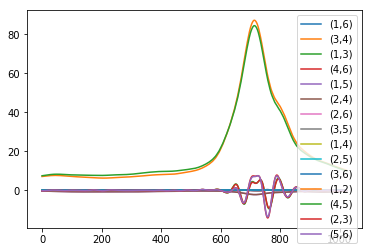

In [17]:
plt.plot(vis_2(prod_ind(0,10))) 
plt.plot(vis_2(prod_ind(4,6)))
plt.plot(vis_2(prod_ind(0,4))) 
plt.plot(vis_2(prod_ind(6,10)))
plt.plot(vis_2(prod_ind(8,0)))# same as one below
plt.plot(vis_2(prod_ind(2,6)))
plt.plot(vis_2(prod_ind(2,10)))## same as one below, different from both above...not listed in uniquepairs, no change
plt.plot(vis_2(prod_ind(4,8)))
plt.plot(vis_2(prod_ind(6,0))) # not in uniquepairs
plt.plot(vis_2(prod_ind(2,8))) # 2,8 gives 0, not in uniquepairs
plt.plot(vis_2(prod_ind(4,10)))
plt.plot(vis_2(prod_ind(2,0))) #2,0 listed in uniquepairs
plt.plot(vis_2(prod_ind(6,8))) #8,6 in uniquepairs
plt.plot(vis_2(prod_ind(2,4))) #not in uniquepairs
plt.plot(vis_2(prod_ind(8,10)))
plt.legend(('(1,6)','(3,4)','(1,3)','(4,6)','(1,5)','(2,4)','(2,6)','(3,5)','(1,4)','(2,5)','(3,6)','(1,2)','(4,5)','(2,3)','(5,6)'))

Text(0,0.5,'Visibility for 1 m baseline')

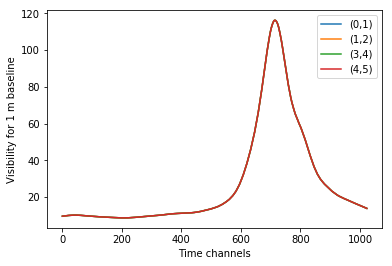

In [37]:
plt.plot(vis_2(prod_ind(0,1)))
plt.plot(vis_2(prod_ind(1,2)))
plt.plot(vis_2(prod_ind(3,4)))
plt.plot(vis_2(prod_ind(4,5)))
plt.legend(('(0,1)','(1,2)','(3,4)','(4,5)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for 1 m baseline')

Text(0,0.5,'Visibility for 2 m baseline')

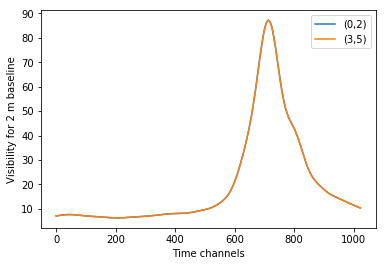

In [38]:
plt.plot(vis_2(prod_ind(0,2)))
plt.plot(vis_2(prod_ind(3,5)))

# the 6,4 gives 0 vis, uniquepairs lists 4,6
#plt.plot(vis_2(prod_ind(2,10)))## same as one below, different from both above...not listed in uniquepairs, no change
#plt.plot(vis_2(prod_ind(4,8)))## not listed in uniquepairs
plt.legend(('(0,2)','(3,5)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for 2 m baseline')

Text(0,0.5,'Visibility for short diagonal baseline, NE')

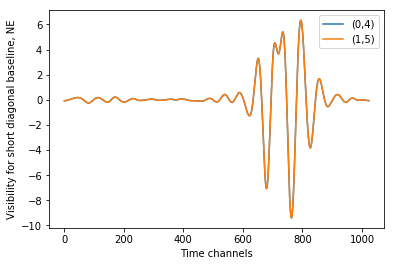

In [48]:
plt.plot(vis_2(prod_ind(0,4))) 
#plt.plot(vis_2(prod_ind(1,3))) #6,10 is similar to 0,4. uniquepairs lists 10,6
plt.plot(vis_2(prod_ind(1,5)))
#plt.plot(vis_2(prod_ind(2,4)))

#plt.plot(vis_2(prod_ind(2,4))) #not in uniquepairs
#plt.plot(vis_2(prod_ind(8,10)))#not in uniquepairs

plt.legend(('(0,4)','(1,5)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for short diagonal baseline, NE')

Text(0,0.5,'Visibility for short diagonal baseline, NW')

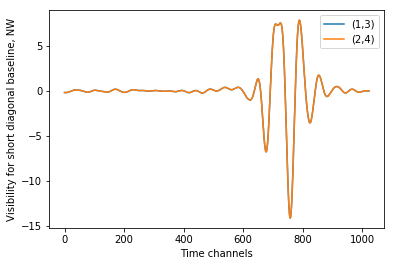

In [50]:
plt.plot(vis_2(prod_ind(1,3))) #6,10 is similar to 0,4. uniquepairs lists 10,6
plt.plot(vis_2(prod_ind(2,4)))
plt.legend(('(1,3)','(2,4)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for short diagonal baseline, NW')

Text(0,0.5,'Visibility for long diagonal, NE and NW')

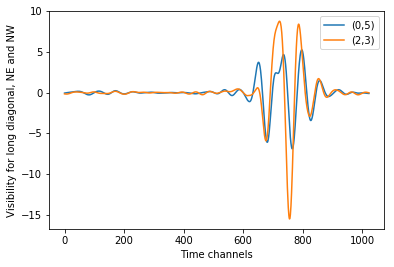

In [52]:
#Baseline sqrt(53)
plt.plot(vis_2(prod_ind(0,5)))# same as one below...
plt.plot(vis_2(prod_ind(2,3)))#uniquepairs lists 2,6
#plt.plot(vis_2(prod_ind(3,7)))## same as one below, different from both above...not listed in uniquepairs
#plt.plot(vis_2(prod_ind(1,9)))## not listed in uniquepairs
plt.legend(('(0,5)','(2,3)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for long diagonal, NE and NW')

Text(0,0.5,'Visibility for 7 m baseline')

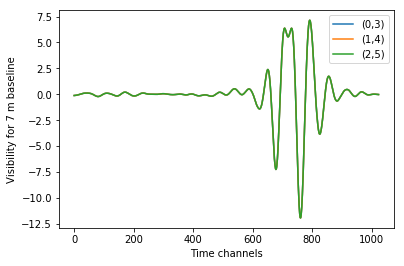

In [53]:
plt.plot(vis_2(prod_ind(0,3))) # not in uniquepairs
plt.plot(vis_2(prod_ind(1,4))) # not in uniquepairs
plt.plot(vis_2(prod_ind(2,5)))# not in uniquepairs
#plt.plot(vis_2(prod_ind(1,7)))
#plt.plot(vis_2(prod_ind(3,9)))
#plt.plot(vis_2(prod_ind(5,11)))
plt.legend(('(0,3)','(1,4)','(2,5)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility for 7 m baseline')

Text(0,0.5,'Visibility')

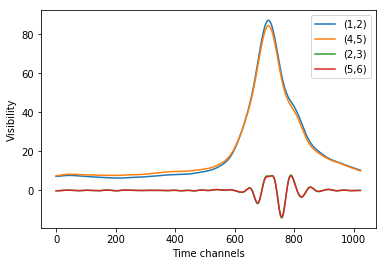

In [23]:
plt.plot(vis_2(prod_ind(0,2))) #2,0 listed in uniquepairs
plt.plot(vis_2(prod_ind(6,8))) # 8,6 in uniquepairs
plt.plot(vis_2(prod_ind(2,4))) # not in uniquepairs
plt.plot(vis_2(prod_ind(8,10)))#not in uniquepairs
plt.legend(('(1,2)','(4,5)','(2,3)','(5,6)'))
plt.xlabel('Time channels')
plt.ylabel('Visibility')

In [24]:
du = 2
dv = 3
num = (du+dv)*(du+dv-1)/2 +(du+dv)
ind_grid = np.zeros((num,num))
for i in range(num):
    for j in range(num):
        if np.array_equal(np.array(vis_2(i)),np.array(vis_2(j))):
            ind_grid[i,j]=1

In [54]:
file_ag_2.close()
file_ts_2.close()
file_rg_2.close()

In [20]:
np.array_equal(np.zeros(3),np.zeros(3))

True

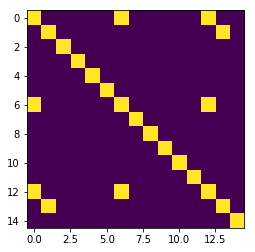

In [25]:
plt.imshow(ind_grid)